# salinity / conductivity

*summary about why we care about salinity/conductivity*

---

## background, sensing physics

In [1]:
# To hide code from jupyter rendering add "remove-input" tag in cell, see: 
#    https://jupyterbook.org/en/stable/content/metadata.html#jupyter-cell-tags

# pandas and html links:
#    https://github.com/softhints/Pandas-Tutorials/blob/master/styling/create-clickable-link-pandas-dataframe-jupyterlab.ipynb?ref=datascientyst.com

import numpy as np
import pandas as pd
from IPython.display import HTML
import xarray as xr

import matplotlib.pyplot as plt

import gsw

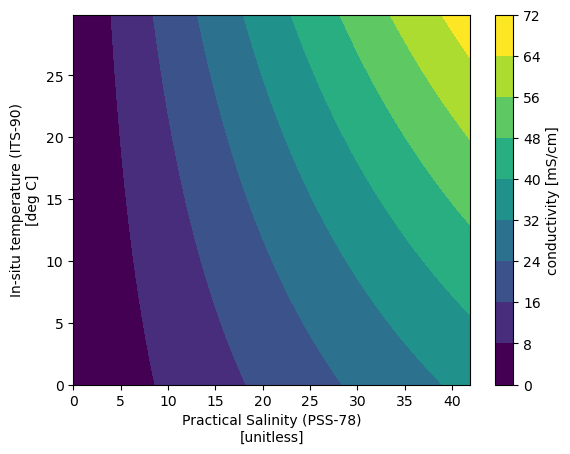

In [4]:

# generate dummy dataset to explore equation of state
w = xr.Dataset(
    coords={
        "t": ("t", np.arange(0,30,.1), {"units": "deg C", "long_name": "In-situ temperature (ITS-90)"}),
        "Sp": ("Sp", np.arange(0,42,.1), {"units": "unitless", "long_name": "Practical Salinity (PSS-78)"}),
    },
)
w["C"] = gsw.C_from_SP(w["Sp"], w["t"], 0.)
w["C"].attrs.update(
    units="mS/cm",
    long_name="conductivity",
)
w["C"].plot.contourf(x="Sp", levels=10);

---
## Available sensors

In [3]:
s = pd.read_csv("sensors.csv")
HTML(s.to_html(render_links=True, escape=False))

,Capteur,EOV/EBV,Materiel Principal,link
0,SmartFluo,Chlorophylle A,Smartphone,https://www.mdpi.com/1424-8220/17/4/678
1,Other,Chlorophylle A,Smartphone,https://www.mdpi.com/1424-8220/13/6/7872
